# Momentum with Different Polynomials


In [1]:
import torch
import torch.nn as nn
import matplotlib.pylab as plt
import numpy as np

%matplotlib inline
torch.manual_seed(0)

In [2]:
# Plot the cubic


def plot_cubic(w, optimizer):
    LOSS = []
    # parameter values
    W = torch.arange(-4, 4, 0.1)
    # plot the loss fuction
    for w.state_dict()["linear.weight"][0] in W:
        LOSS.append(cubic(w(torch.tensor([[1.0]]))).item())
    w.state_dict()["linear.weight"][0] = 4.0
    n_epochs = 10
    parameter = []
    loss_list = []

    # n_epochs
    # Use PyTorch custom module to implement a ploynomial function
    for n in range(n_epochs):
        optimizer.zero_grad()
        loss = cubic(w(torch.tensor([[1.0]])))
        loss_list.append(loss)
        parameter.append(w.state_dict()["linear.weight"][0].detach().data.item())
        loss.backward()
        optimizer.step()
    plt.plot(
        parameter,
        [loss.detach().numpy().flatten() for loss in loss_list],
        "ro",
        label="parameter values",
    )

    plt.plot(W.numpy(), LOSS, label="objective function")
    plt.xlabel("w")
    plt.ylabel("l(w)")
    plt.legend()

In [3]:
# Plot the fourth order function and the parameter values


def plot_fourth_order(
    w, optimizer, std=0, color="r", paramlabel="parameter values", objfun=True
):
    W = torch.arange(-4, 6, 0.1)
    LOSS = []
    for w.state_dict()["linear.weight"][0] in W:
        LOSS.append(fourth_order(w(torch.tensor([[1.0]]))).item())
    w.state_dict()["linear.weight"][0] = 6
    n_epochs = 100
    parameter = []
    loss_list = []

    # n_epochs
    for n in range(n_epochs):
        optimizer.zero_grad()
        loss = fourth_order(w(torch.tensor([[1.0]]))) + std * torch.randn(1, 1)
        loss_list.append(loss)
        parameter.append(w.state_dict()["linear.weight"][0].detach().data.item())
        loss.backward()
        optimizer.step()

    # Plotting
    if objfun:
        plt.plot(W.numpy(), LOSS, label="objective function")

    plt.plot(
        parameter,
        [loss.detach().numpy().flatten() for loss in loss_list],
        "ro",
        label="paramlabel",
    )
    plt.xlabel("w")
    plt.ylabel("l(w)")
    plt.legend()

This is a custom module. It will behave like a single parameter value.

In [4]:
# This is a custom module. It will behave like a single parameter value.


class one_param(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(one_param, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias=False)

    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [5]:
# Create a one_param object
w = one_param(1, 1)

In [6]:
# Function to output a cubic


def cubic(yhat):
    out = yhat**3
    return out

## Saddle Points


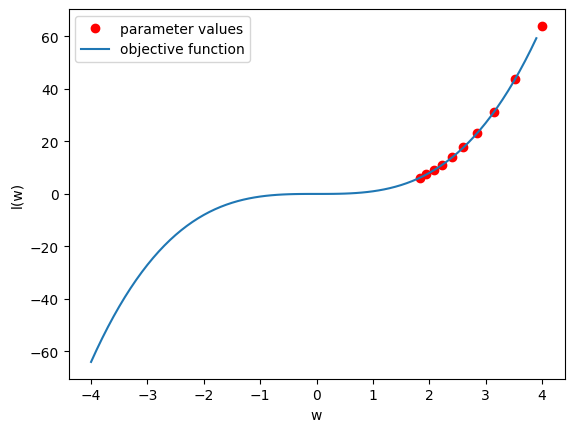

In [7]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0)
plot_cubic(w, optimizer)

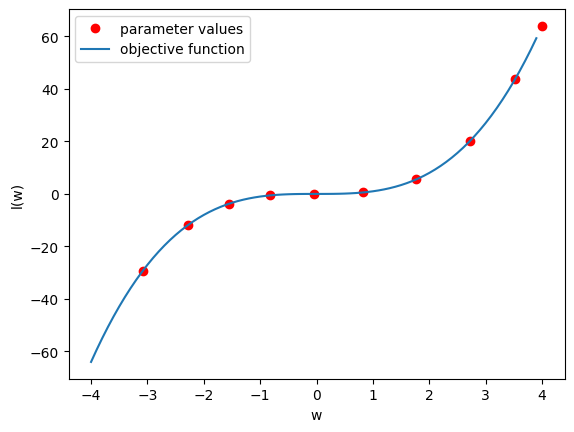

In [8]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0.9)
plot_cubic(w, optimizer)

## Local Minima


In [9]:
# Create a function to calculate the fourth order polynomial


def fourth_order(yhat):
    out = torch.mean(2 * (yhat**4) - 9 * (yhat**3) - 21 * (yhat**2) + 88 * yhat + 48)
    return out

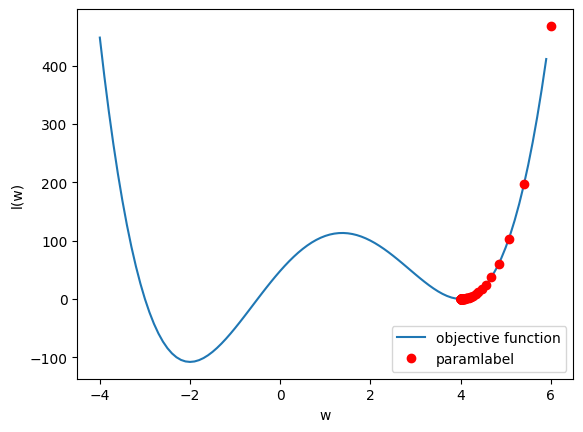

In [10]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer)

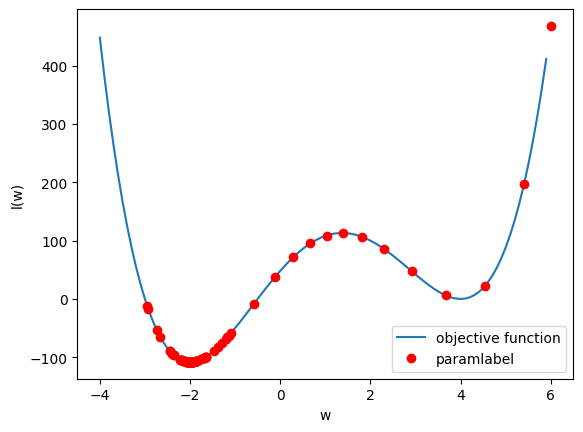

In [11]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.001, momentum=0.9)
plot_fourth_order(w, optimizer)

## Noise

We will create a fourth order polynomial with a local minimum at 4 and a global minimum a -2, but we will add noise to the function when the Gradient is calculated. We will then see how the momentum parameter affects convergence to a global minimum.


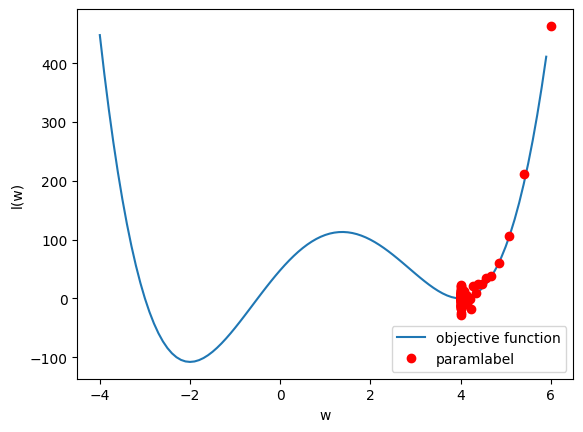

In [12]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer, std=10)

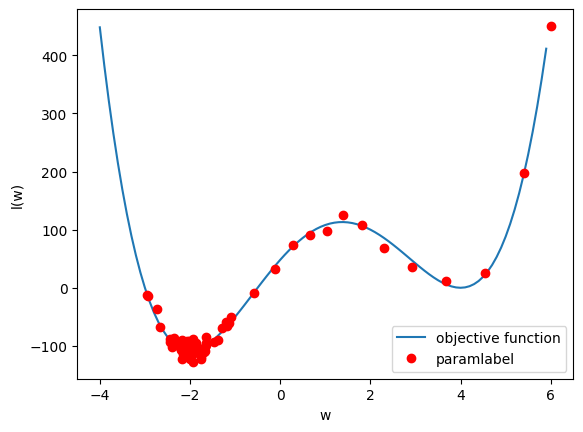

In [13]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.001, momentum=0.9)
plot_fourth_order(w, optimizer, std=10)

with momentum, we get to the global minimum


## Testing


In [14]:
optimizer1 = torch.optim.SGD(w.parameters(), lr=0.001)
optimizer2 = torch.optim.SGD(w.parameters(), lr=0.001, momentum=0.9)

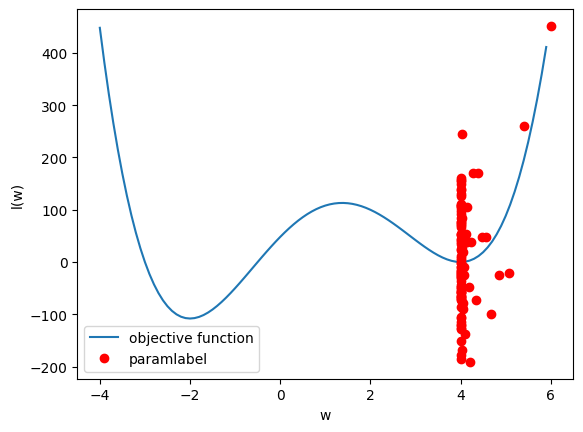

In [15]:
plot_fourth_order(w, optimizer1, std=100)

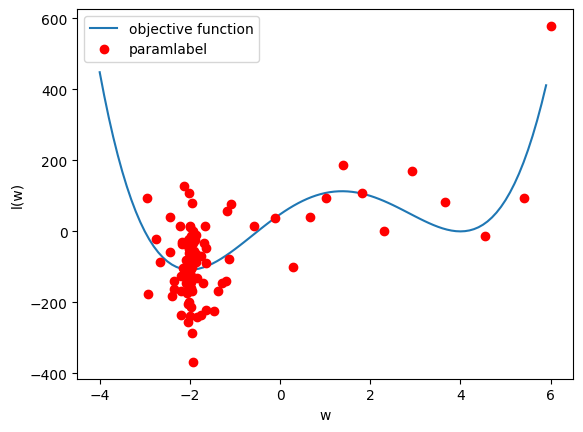

In [16]:
plot_fourth_order(w, optimizer2, std=100)